In [1]:
import os
from sklearn.manifold import TSNE
import numpy as np  
import pickle

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
os.listdir()

['BGC.csv',
 'BGC_dataset.csv',
 'BGC_train_dataset.csv',
 'get_dataset.ipynb',
 'NineGenomes_128.csv',
 'Nine_genomes_test_dataset.csv',
 'BGC_train_dataset_plus.csv',
 'BGC_train_dataset_inbalence.csv',
 'BGC_train_dataset_aug.csv',
 'get_embeddings_training.ipynb',
 'get_train_embeddings.py',
 'nohup.out',
 'classify.ipynb',
 'BGC_train_dataset_classify.csv',
 'embedding.ipynb']

In [4]:
import lmdb

In [5]:
# env = lmdb.open('../lmdb_BGC_only/', readonly=True)
env = lmdb.open('../lmdb_BGC_650M/', readonly=True)

In [10]:
with env.begin() as txn:
    cursor = txn.cursor()
    for key, value in cursor:
        print(key, value)
        break

b'BGC0000001_protein_1' b'\x80\x04\x95\xbb\x15\x00\x00\x00\x00\x00\x00}\x94(\x8c\x05label\x94\x8c\x14BGC0000001_protein_1\x94\x8c\x14mean_representations\x94}\x94K!\x8c\x0ctorch._utils\x94\x8c\x12_rebuild_tensor_v2\x94\x93\x94(\x8c\rtorch.storage\x94\x8c\x10_load_from_bytes\x94\x93\x94B\xf4\x14\x00\x00\x80\x02\x8a\nl\xfc\x9cF\xf9 j\xa8P\x19.\x80\x02M\xe9\x03.\x80\x02}q\x00(X\x10\x00\x00\x00protocol_versionq\x01M\xe9\x03X\r\x00\x00\x00little_endianq\x02\x88X\n\x00\x00\x00type_sizesq\x03}q\x04(X\x05\x00\x00\x00shortq\x05K\x02X\x03\x00\x00\x00intq\x06K\x04X\x04\x00\x00\x00longq\x07K\x04uu.\x80\x02(X\x07\x00\x00\x00storageq\x00ctorch\nFloatStorage\nq\x01X\n\x00\x00\x001988617152q\x02X\x03\x00\x00\x00cpuq\x03M\x00\x05Ntq\x04Q.\x80\x02]q\x00X\n\x00\x00\x001988617152q\x01a.\x00\x05\x00\x00\x00\x00\x00\x00\xb5\x04\n\xbc\x7f\x04\\\xbc\x06\x10\xd9\xbc\x7f\xb0A\xbdlsw\xbd\xd4\xc3i\xbd\x1a~\x92\xbcU\x05\x079\x0b\x87\x88\xbc\x8em)=qY\r\xbdpZ\x85<\x83\xa9W=\\\x1c\x82=\xb2q\x07\xbd9\xec\x9a=M\x84e\xb

In [11]:
with env.begin() as txn:
    cursor = txn.cursor()
    for key, value in cursor:
        # print(key, value)
        print(pickle.loads(value))
        break

{'label': 'BGC0000001_protein_1', 'mean_representations': {33: tensor([-0.0084, -0.0134, -0.0265,  ..., -0.2047,  0.0600,  0.0973])}}


In [21]:
key_list = []
value_list = []
with env.begin() as txn:
    cursor = txn.cursor()
    for key, value in cursor:
        key_list.append(key)
        value_list.append(pickle.loads(value)['mean_representations'][6])
        # print(key, value)
        # break

/home/yaoshuai/anaconda3/envs/pt/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


KeyboardInterrupt: 

In [14]:
len(key_list), len(value_list)

(41002, 41002)

In [15]:
BGC_dict = dict(zip(key_list, value_list))
BGC_dict

{b'BGC0000001_protein_1': tensor([-0.0084, -0.0134, -0.0265,  ..., -0.2047,  0.0600,  0.0973]),
 b'BGC0000001_protein_10': tensor([-0.0133, -0.0403, -0.0252,  ..., -0.1796,  0.0714,  0.0386]),
 b'BGC0000001_protein_11': tensor([-0.0995,  0.0247, -0.0418,  ..., -0.1117,  0.0255,  0.0575]),
 b'BGC0000001_protein_12': tensor([-0.0057, -0.0636, -0.0425,  ..., -0.1600,  0.0743,  0.1110]),
 b'BGC0000001_protein_13': tensor([-0.0518, -0.0808,  0.0098,  ..., -0.1591,  0.1042,  0.0394]),
 b'BGC0000001_protein_14': tensor([-0.0527, -0.0788,  0.0189,  ..., -0.1618,  0.1098,  0.0687]),
 b'BGC0000001_protein_15': tensor([-0.0481, -0.0781,  0.0207,  ..., -0.1559,  0.1043,  0.0309]),
 b'BGC0000001_protein_16': tensor([-0.0194,  0.0006,  0.0098,  ..., -0.1614,  0.0505,  0.0127]),
 b'BGC0000001_protein_17': tensor([-0.0836, -0.0298, -0.0699,  ..., -0.1492,  0.0613,  0.1129]),
 b'BGC0000001_protein_18': tensor([-0.0385, -0.0622, -0.0505,  ..., -0.1497,  0.0679,  0.0328]),
 b'BGC0000001_protein_19': tens

In [16]:
key_list[0], value_list[0].shape

(b'BGC0000001_protein_1', torch.Size([1280]))

In [44]:
key_list, value_list

([b'BGC0000001_protein_1',
  b'BGC0000001_protein_10',
  b'BGC0000001_protein_11',
  b'BGC0000001_protein_12',
  b'BGC0000001_protein_13',
  b'BGC0000001_protein_14',
  b'BGC0000001_protein_15',
  b'BGC0000001_protein_16',
  b'BGC0000001_protein_17',
  b'BGC0000001_protein_18',
  b'BGC0000001_protein_19',
  b'BGC0000001_protein_2',
  b'BGC0000001_protein_20',
  b'BGC0000001_protein_21',
  b'BGC0000001_protein_22',
  b'BGC0000001_protein_23',
  b'BGC0000001_protein_24',
  b'BGC0000001_protein_25',
  b'BGC0000001_protein_26',
  b'BGC0000001_protein_27',
  b'BGC0000001_protein_28',
  b'BGC0000001_protein_3',
  b'BGC0000001_protein_4',
  b'BGC0000001_protein_5',
  b'BGC0000001_protein_6',
  b'BGC0000001_protein_7',
  b'BGC0000001_protein_8',
  b'BGC0000001_protein_9',
  b'BGC0000002_protein_1',
  b'BGC0000002_protein_10',
  b'BGC0000002_protein_11',
  b'BGC0000002_protein_12',
  b'BGC0000002_protein_13',
  b'BGC0000002_protein_14',
  b'BGC0000002_protein_15',
  b'BGC0000002_protein_16',
  

In [17]:
sentence_embedding = np.stack(value_list)

In [18]:
sentence_embedding.shape

(41002, 1280)

In [19]:
tsne = TSNE(n_components=2, random_state=0)
vector_2d = tsne.fit_transform(sentence_embedding)
x_axis = vector_2d[:, 0]
y_axis = vector_2d[:, 1]

In [20]:
x_axis.shape, y_axis.shape

((41002,), (41002,))

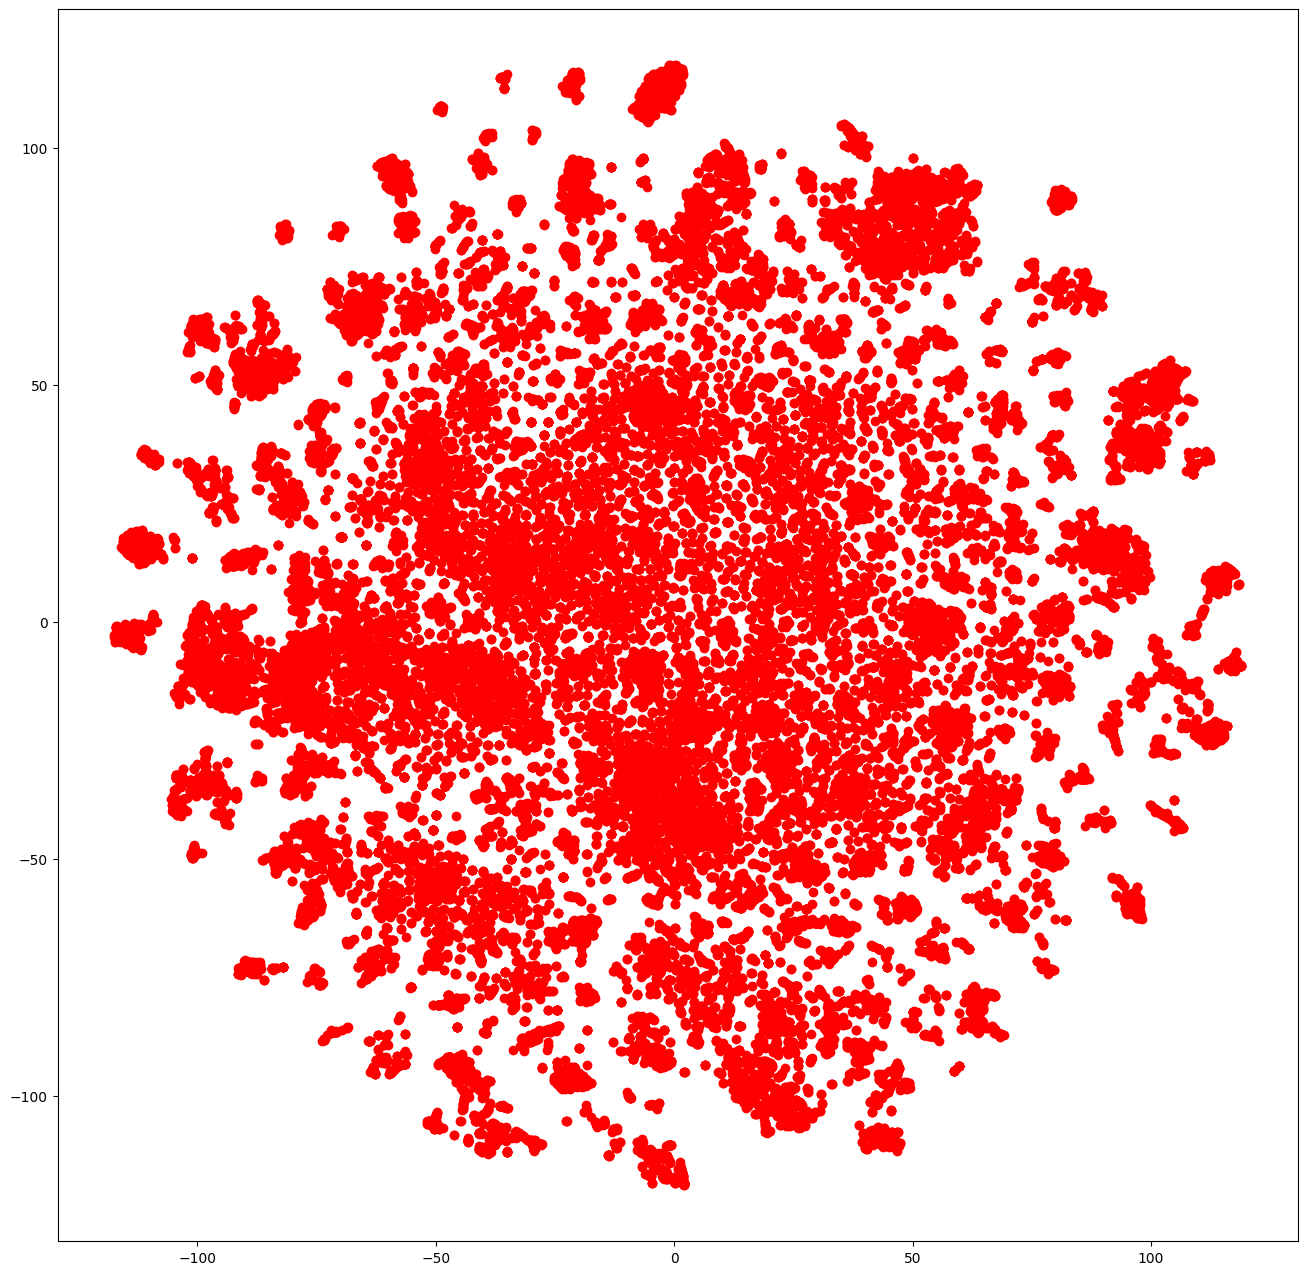

In [21]:
plt.figure(figsize=(16, 16))
plt.scatter(x_axis, y_axis, c='r')
plt.show()


In [22]:
BGC_2d_dict = dict(zip(key_list, vector_2d))

In [23]:
BGC_2d_dict

{b'BGC0000001_protein_1': array([-29.246737,  13.177681], dtype=float32),
 b'BGC0000001_protein_10': array([-88.42235 ,  58.481728], dtype=float32),
 b'BGC0000001_protein_11': array([-7.73662 , 35.010574], dtype=float32),
 b'BGC0000001_protein_12': array([-10.161896,  35.42199 ], dtype=float32),
 b'BGC0000001_protein_13': array([42.02664, 74.4097 ], dtype=float32),
 b'BGC0000001_protein_14': array([48.173496, 85.23054 ], dtype=float32),
 b'BGC0000001_protein_15': array([41.905685, 74.263275], dtype=float32),
 b'BGC0000001_protein_16': array([-68.10324,  64.50703], dtype=float32),
 b'BGC0000001_protein_17': array([  25.942427, -102.144936], dtype=float32),
 b'BGC0000001_protein_18': array([36.08565 , 25.043732], dtype=float32),
 b'BGC0000001_protein_19': array([-27.709984, -21.496923], dtype=float32),
 b'BGC0000001_protein_2': array([-78.09821  ,   7.3212037], dtype=float32),
 b'BGC0000001_protein_20': array([ 47.144447, -94.22425 ], dtype=float32),
 b'BGC0000001_protein_21': array([ 46

In [8]:
BGC_dataset = pd.read_csv('../data/BGC_dataset.csv')
BGC_dataset.head()

BGC_id                                           sequence  \
0  BGC0000001  BGC0000001_protein_1 BGC0000001_protein_2 BGC0...   
1  BGC0000002  BGC0000002_protein_1 BGC0000002_protein_2 BGC0...   
2  BGC0000003  BGC0000003_protein_1 BGC0000003_protein_2 BGC0...   
3  BGC0000004  BGC0000004_protein_1 BGC0000004_protein_2 BGC0...   
4  BGC0000006  BGC0000006_protein_1 BGC0000006_protein_2 BGC0...   

                  labels isBGC  
0                    NRP   Yes  
1  Polyketide Saccharide   Yes  
2                  Other   Yes  
3             Polyketide   Yes  
4               Alkaloid   Yes

In [9]:
BGC_seq = BGC_dataset['sequence'].values
BGC_seq

array(['BGC0000001_protein_1 BGC0000001_protein_2 BGC0000001_protein_3 BGC0000001_protein_4 BGC0000001_protein_5 BGC0000001_protein_6 BGC0000001_protein_7 BGC0000001_protein_8 BGC0000001_protein_9 BGC0000001_protein_10 BGC0000001_protein_11 BGC0000001_protein_12 BGC0000001_protein_13 BGC0000001_protein_14 BGC0000001_protein_15 BGC0000001_protein_16 BGC0000001_protein_17 BGC0000001_protein_18 BGC0000001_protein_19 BGC0000001_protein_20 BGC0000001_protein_21 BGC0000001_protein_22 BGC0000001_protein_23 BGC0000001_protein_24 BGC0000001_protein_25 BGC0000001_protein_26 BGC0000001_protein_27 BGC0000001_protein_28',
       'BGC0000002_protein_1 BGC0000002_protein_2 BGC0000002_protein_3 BGC0000002_protein_4 BGC0000002_protein_5 BGC0000002_protein_6 BGC0000002_protein_7 BGC0000002_protein_8 BGC0000002_protein_9 BGC0000002_protein_10 BGC0000002_protein_11 BGC0000002_protein_12 BGC0000002_protein_13 BGC0000002_protein_14 BGC0000002_protein_15 BGC0000002_protein_16 BGC0000002_protein_17 BGC0000002

In [10]:
len(BGC_seq)

2502

In [11]:
BGC_dict.keys()

NameError: name 'BGC_dict' is not defined

In [28]:
BGC_embedding = []
for i in range(len(BGC_seq)):
    seq = BGC_seq[i]
    seq_embedding = np.array([0.0]*2)
    for word in seq.split():
        word_embedding = np.array(BGC_2d_dict[word.encode('ascii')])
        seq_embedding += word_embedding
    BGC_embedding.append(seq_embedding)

In [29]:
BGC_embedding 

[array([231.31069326, 868.75063826]),
 array([ 569.02531719, 1573.34690666]),
 array([-120.72219276, -315.54825211]),
 array([ -723.99715471, -1565.48891068]),
 array([ -724.28753901, -1564.74589539]),
 array([ -788.81531405, -1731.41571712]),
 array([ -724.18607759, -1565.21196651]),
 array([ -789.0666337, -1730.7756815]),
 array([ -699.31640923, -1479.13119602]),
 array([ -953.13140392, -1486.91519451]),
 array([-182.97903442, -491.15693665]),
 array([ -64.35546303, -148.12439346]),
 array([356.03373456, 145.24953538]),
 array([-17.22874761,  55.99601364]),
 array([ 191.8436799 , -351.91407585]),
 array([255.67572784, 442.66750336]),
 array([109.11265278, 486.16462612]),
 array([ -0.99762702, 985.05312592]),
 array([ 160.63434297, 2071.09586906]),
 array([-467.69678539, -827.13341522]),
 array([739.15147591,  24.92955017]),
 array([184.92453384, 506.92177708]),
 array([264.11219478,  98.34405994]),
 array([-67.55599844, 170.86658478]),
 array([-1256.55574837, -1506.91255093]),
 array

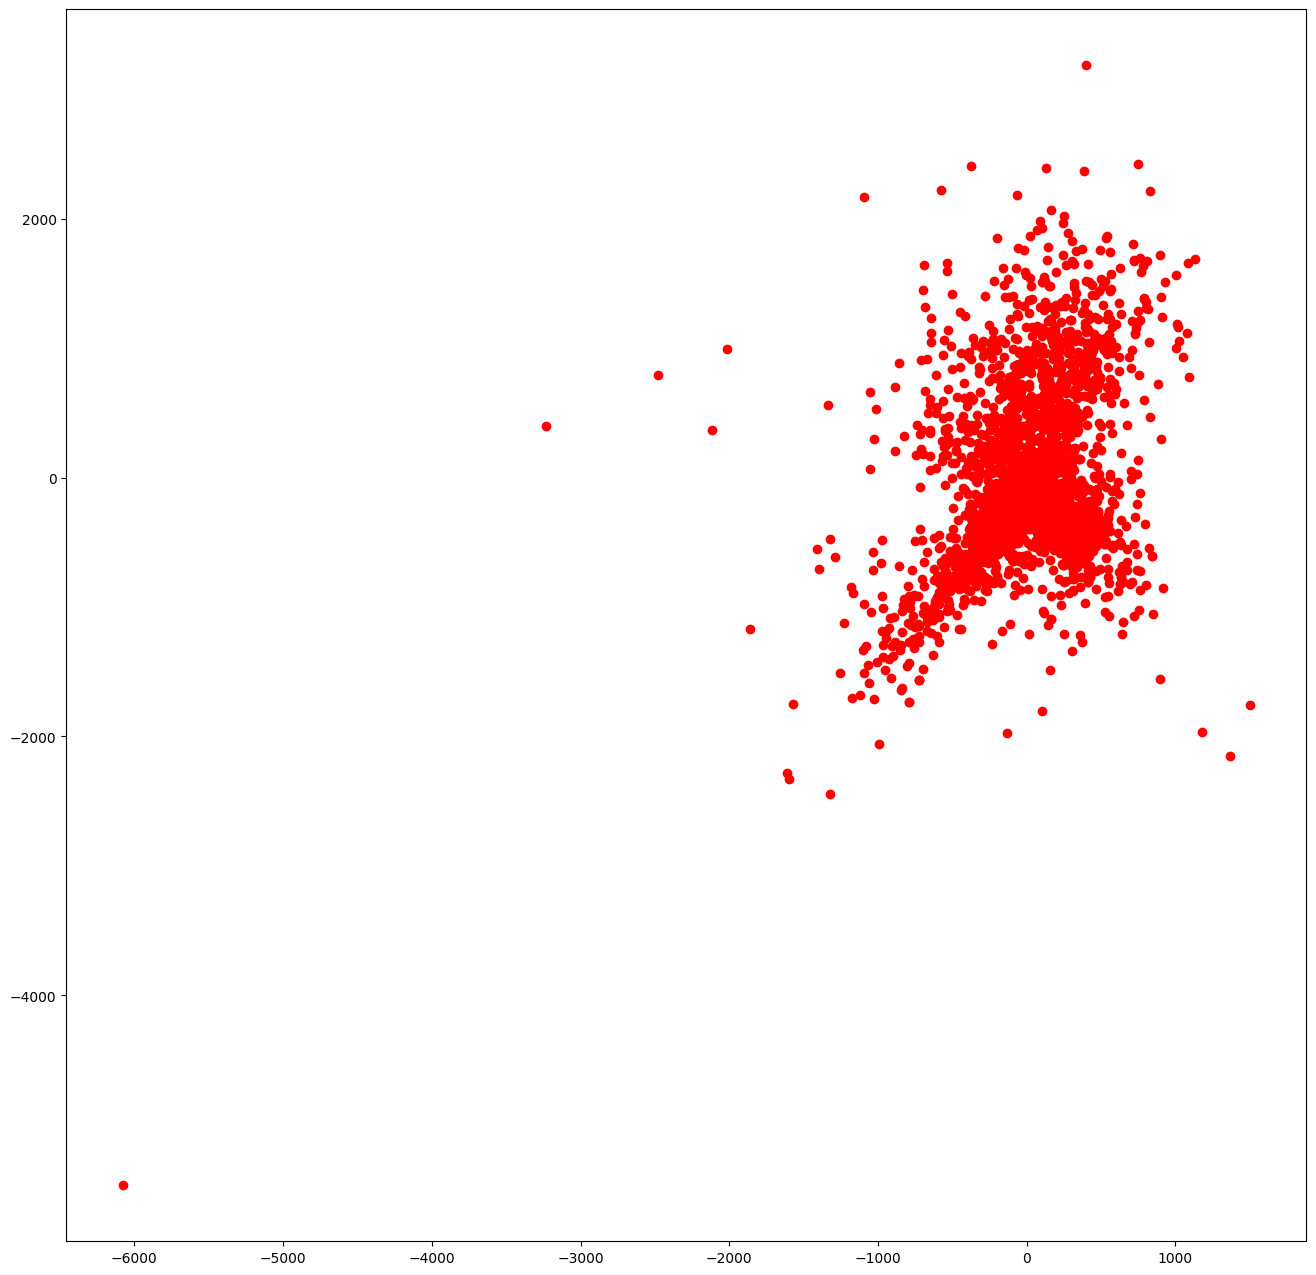

In [30]:
# plot
plt.figure(figsize=(16, 16))
plt.scatter(np.array(BGC_embedding)[:, 0], np.array(BGC_embedding)[:, 1], c='r')
plt.show()



In [31]:
BGC_dataset

BGC_id                                           sequence  \
0     BGC0000001  BGC0000001_protein_1 BGC0000001_protein_2 BGC0...   
1     BGC0000002  BGC0000002_protein_1 BGC0000002_protein_2 BGC0...   
2     BGC0000003  BGC0000003_protein_1 BGC0000003_protein_2 BGC0...   
3     BGC0000004  BGC0000004_protein_1 BGC0000004_protein_2 BGC0...   
4     BGC0000006  BGC0000006_protein_1 BGC0000006_protein_2 BGC0...   
...          ...                                                ...   
2497  BGC0002736          BGC0002736_protein_1 BGC0002736_protein_2   
2498  BGC0002745  BGC0002745_protein_1 BGC0002745_protein_2 BGC0...   
2499  BGC0002746  BGC0002746_protein_1 BGC0002746_protein_2 BGC0...   
2500  BGC0002747  BGC0002747_protein_1 BGC0002747_protein_2 BGC0...   
2501  BGC0002749  BGC0002749_protein_1 BGC0002749_protein_2 BGC0...   

                     labels isBGC  
0                       NRP   Yes  
1     Polyketide Saccharide   Yes  
2                     Other   Yes  
3                Polyketide   Yes  
4                  Alkaloid   Yes  
...                     ...   ...  
2497             Polyketide   Yes  
2498         NRP Polyketide   Yes  
2499             Saccharide   Yes  
2500                  Other   Yes  
2501                    NRP   Yes  

[2502 rows x 4 columns]

In [32]:
from collections import defaultdict
BGC_label_dict = defaultdict(list)

In [33]:
for i in range(len(BGC_dataset)):
    example = BGC_dataset.iloc[i]
    # print(example)
    labels = example['labels'].split()
    label_rep = labels[0]
    seq = example['sequence'].split()
    BGC_label_dict[label_rep].append(seq)


In [34]:
BGC_label_dict

defaultdict(list,
            {'NRP': [['BGC0000001_protein_1',
               'BGC0000001_protein_2',
               'BGC0000001_protein_3',
               'BGC0000001_protein_4',
               'BGC0000001_protein_5',
               'BGC0000001_protein_6',
               'BGC0000001_protein_7',
               'BGC0000001_protein_8',
               'BGC0000001_protein_9',
               'BGC0000001_protein_10',
               'BGC0000001_protein_11',
               'BGC0000001_protein_12',
               'BGC0000001_protein_13',
               'BGC0000001_protein_14',
               'BGC0000001_protein_15',
               'BGC0000001_protein_16',
               'BGC0000001_protein_17',
               'BGC0000001_protein_18',
               'BGC0000001_protein_19',
               'BGC0000001_protein_20',
               'BGC0000001_protein_21',
               'BGC0000001_protein_22',
               'BGC0000001_protein_23',
               'BGC0000001_protein_24',
               'BGC00000

In [35]:
BGC_label_dict.keys()

dict_keys(['NRP', 'Polyketide', 'Other', 'Alkaloid', 'RiPP', 'Saccharide', 'Terpene'])

In [37]:
BGC_1280_mean_embedding = defaultdict(list)
for label_rep, seq_list in BGC_label_dict.items():
    for seq in seq_list:
        seq_embedding = np.array([0.0]*1280)
        for word in seq:
            word_embedding = np.array(BGC_dict[word.encode('ascii')])
            seq_embedding += word_embedding
        BGC_1280_mean_embedding[label_rep].append(seq_embedding/len(seq))

In [38]:
BGC_1280_mean_embedding

defaultdict(list,
            {'NRP': [array([-0.03168383, -0.04814036, -0.02519363, ..., -0.14774749,
                      0.06996255,  0.0573283 ]),
              array([-0.0099141 , -0.05119127, -0.04186848, ..., -0.1760518 ,
                      0.02811717,  0.05153517]),
              array([-0.00556159, -0.04880156, -0.03904465, ..., -0.17269039,
                      0.02579659,  0.05039948]),
              array([-0.02087524, -0.04692128, -0.00980701, ..., -0.13797752,
                      0.0635026 ,  0.06279266]),
              array([ 1.38921553e-04, -6.36512650e-02, -1.22950869e-02, ...,
                     -1.44276853e-01,  2.61935063e-02,  1.90618110e-02]),
              array([-0.03840045, -0.03289707, -0.00982986, ..., -0.13173962,
                      0.04805757,  0.07608637]),
              array([-0.01508265, -0.01466356, -0.00805202, ..., -0.13106664,
                      0.03937008,  0.06199894]),
              array([-0.00789913, -0.04764745, -0.02898503, ..

In [39]:
# TSNE
all_mean_embedding = []
all_mean_label = []
for label_rep, seq_embedding_list in BGC_1280_mean_embedding.items():
    for seq_embedding in seq_embedding_list:
        all_mean_embedding.append(seq_embedding)
        all_mean_label.append(label_rep)
all_mean_embedding = np.stack(all_mean_embedding)
tsne = TSNE(n_components=2, random_state=0)
vector_2d_mean = tsne.fit_transform(all_mean_embedding)
x_axis_mean = vector_2d_mean[:, 0]
y_axis_mean = vector_2d_mean[:, 1]

In [40]:
all_mean_label

['NRP',
 'NRP',
 'NRP',
 'NRP',
 'NRP',
 'NRP',
 'NRP',
 'NRP',
 'NRP',
 'NRP',
 'NRP',
 'NRP',
 'NRP',
 'NRP',
 'NRP',
 'NRP',
 'NRP',
 'NRP',
 'NRP',
 'NRP',
 'NRP',
 'NRP',
 'NRP',
 'NRP',
 'NRP',
 'NRP',
 'NRP',
 'NRP',
 'NRP',
 'NRP',
 'NRP',
 'NRP',
 'NRP',
 'NRP',
 'NRP',
 'NRP',
 'NRP',
 'NRP',
 'NRP',
 'NRP',
 'NRP',
 'NRP',
 'NRP',
 'NRP',
 'NRP',
 'NRP',
 'NRP',
 'NRP',
 'NRP',
 'NRP',
 'NRP',
 'NRP',
 'NRP',
 'NRP',
 'NRP',
 'NRP',
 'NRP',
 'NRP',
 'NRP',
 'NRP',
 'NRP',
 'NRP',
 'NRP',
 'NRP',
 'NRP',
 'NRP',
 'NRP',
 'NRP',
 'NRP',
 'NRP',
 'NRP',
 'NRP',
 'NRP',
 'NRP',
 'NRP',
 'NRP',
 'NRP',
 'NRP',
 'NRP',
 'NRP',
 'NRP',
 'NRP',
 'NRP',
 'NRP',
 'NRP',
 'NRP',
 'NRP',
 'NRP',
 'NRP',
 'NRP',
 'NRP',
 'NRP',
 'NRP',
 'NRP',
 'NRP',
 'NRP',
 'NRP',
 'NRP',
 'NRP',
 'NRP',
 'NRP',
 'NRP',
 'NRP',
 'NRP',
 'NRP',
 'NRP',
 'NRP',
 'NRP',
 'NRP',
 'NRP',
 'NRP',
 'NRP',
 'NRP',
 'NRP',
 'NRP',
 'NRP',
 'NRP',
 'NRP',
 'NRP',
 'NRP',
 'NRP',
 'NRP',
 'NRP',
 'NRP',
 'NRP',


In [41]:
label_set = set(all_mean_label)
label_set

{'Alkaloid', 'NRP', 'Other', 'Polyketide', 'RiPP', 'Saccharide', 'Terpene'}

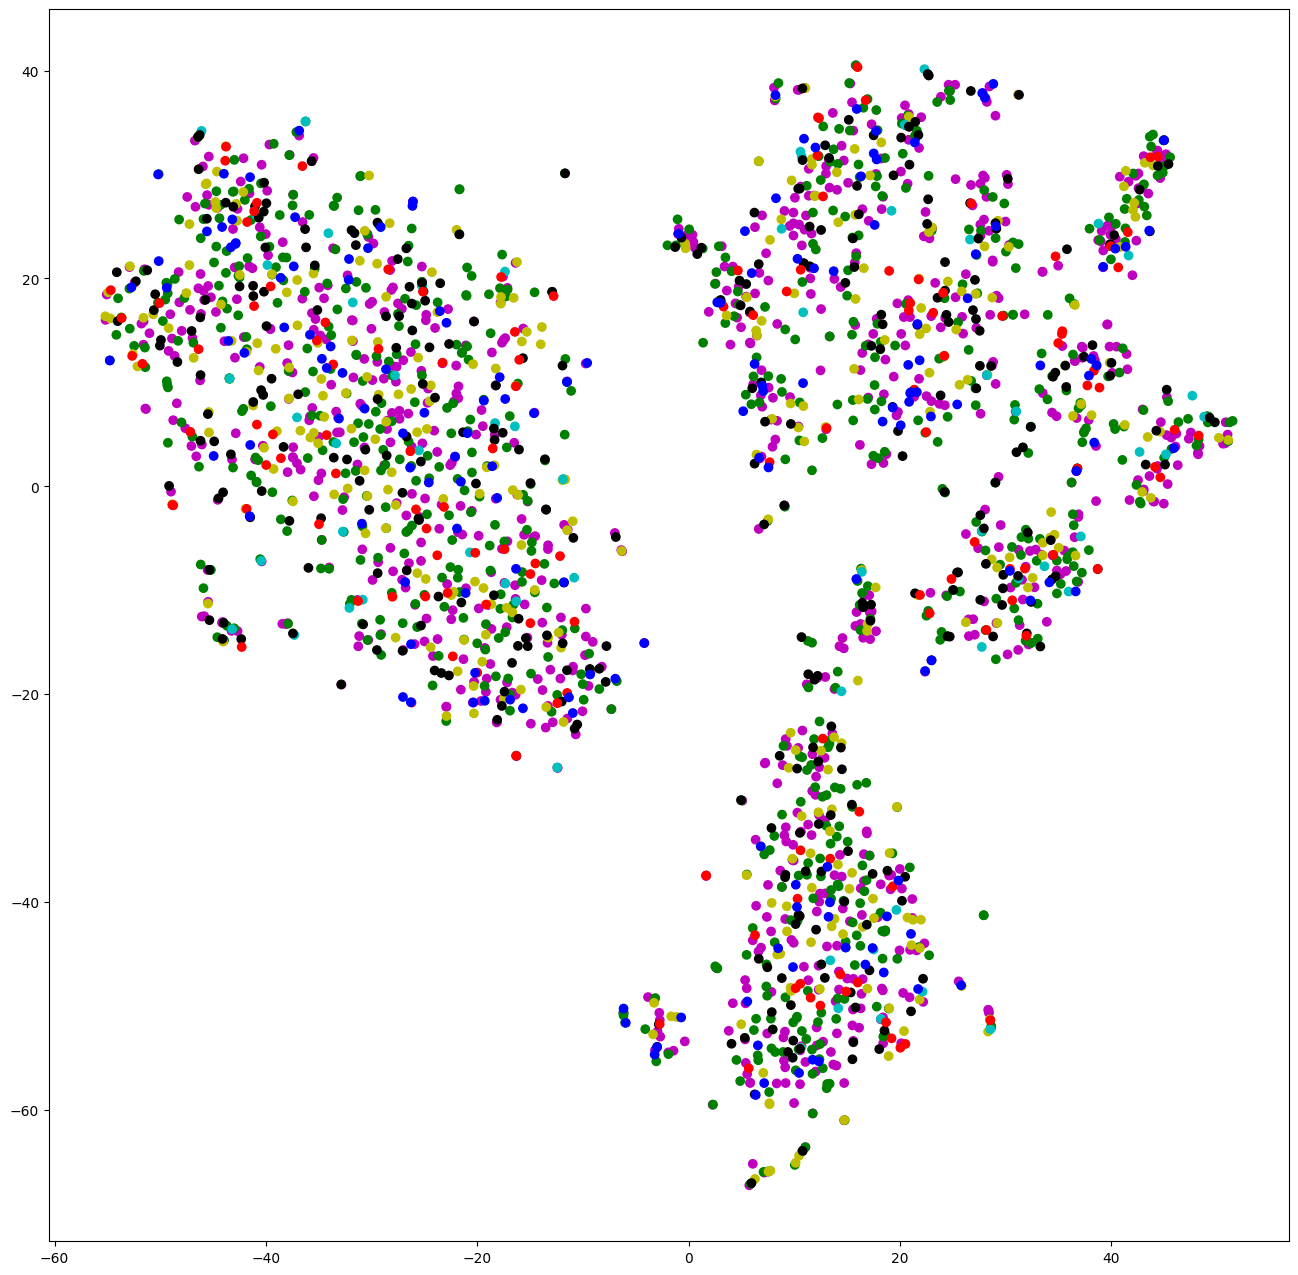

In [42]:
# plot
color_dict = dict(zip(label_set, ['r', 'g', 'b', 'y', 'c', 'm', 'k']))
color_mean = [color_dict[label] for label in all_mean_label]
plt.figure(figsize=(16, 16))
plt.scatter(x_axis_mean, y_axis_mean, c=color_mean)
plt.show()


In [53]:
len(all_mean_embedding), len(all_mean_label)

(2502, 2502)

In [45]:
BGC_seq

array(['BGC0000001_protein_1 BGC0000001_protein_2 BGC0000001_protein_3 BGC0000001_protein_4 BGC0000001_protein_5 BGC0000001_protein_6 BGC0000001_protein_7 BGC0000001_protein_8 BGC0000001_protein_9 BGC0000001_protein_10 BGC0000001_protein_11 BGC0000001_protein_12 BGC0000001_protein_13 BGC0000001_protein_14 BGC0000001_protein_15 BGC0000001_protein_16 BGC0000001_protein_17 BGC0000001_protein_18 BGC0000001_protein_19 BGC0000001_protein_20 BGC0000001_protein_21 BGC0000001_protein_22 BGC0000001_protein_23 BGC0000001_protein_24 BGC0000001_protein_25 BGC0000001_protein_26 BGC0000001_protein_27 BGC0000001_protein_28',
       'BGC0000002_protein_1 BGC0000002_protein_2 BGC0000002_protein_3 BGC0000002_protein_4 BGC0000002_protein_5 BGC0000002_protein_6 BGC0000002_protein_7 BGC0000002_protein_8 BGC0000002_protein_9 BGC0000002_protein_10 BGC0000002_protein_11 BGC0000002_protein_12 BGC0000002_protein_13 BGC0000002_protein_14 BGC0000002_protein_15 BGC0000002_protein_16 BGC0000002_protein_17 BGC0000002

In [46]:
BGC_dict

{b'BGC0000001_protein_1': tensor([-0.0084, -0.0134, -0.0265,  ..., -0.2047,  0.0600,  0.0973]),
 b'BGC0000001_protein_10': tensor([-0.0133, -0.0403, -0.0252,  ..., -0.1796,  0.0714,  0.0386]),
 b'BGC0000001_protein_11': tensor([-0.0995,  0.0247, -0.0418,  ..., -0.1117,  0.0255,  0.0575]),
 b'BGC0000001_protein_12': tensor([-0.0057, -0.0636, -0.0425,  ..., -0.1600,  0.0743,  0.1110]),
 b'BGC0000001_protein_13': tensor([-0.0518, -0.0808,  0.0098,  ..., -0.1591,  0.1042,  0.0394]),
 b'BGC0000001_protein_14': tensor([-0.0527, -0.0788,  0.0189,  ..., -0.1618,  0.1098,  0.0687]),
 b'BGC0000001_protein_15': tensor([-0.0481, -0.0781,  0.0207,  ..., -0.1559,  0.1043,  0.0309]),
 b'BGC0000001_protein_16': tensor([-0.0194,  0.0006,  0.0098,  ..., -0.1614,  0.0505,  0.0127]),
 b'BGC0000001_protein_17': tensor([-0.0836, -0.0298, -0.0699,  ..., -0.1492,  0.0613,  0.1129]),
 b'BGC0000001_protein_18': tensor([-0.0385, -0.0622, -0.0505,  ..., -0.1497,  0.0679,  0.0328]),
 b'BGC0000001_protein_19': tens

In [47]:
BGC_add_embedding = []
for i in range(len(BGC_seq)):
    seq = BGC_seq[i]
    seq_embedding = np.array([0.0]*1280)
    for word in seq.split():
        word_embedding = np.array(BGC_dict[word.encode('ascii')])
        seq_embedding += word_embedding
    BGC_add_embedding.append(seq_embedding)

In [49]:
BGC_add_embedding

[array([-0.88714731, -1.34793006, -0.70542168, ..., -4.13692979,
         1.95895147,  1.60519249]),
 array([-0.48886772, -1.79402456, -0.3603194 , ..., -5.13812843,
         2.1468864 ,  2.4910889 ]),
 array([ 0.05430388, -0.19812893, -0.00588393, ..., -0.85988937,
         0.09684856,  0.23751597]),
 array([-0.15896652, -1.13558214, -0.86611871, ..., -4.00680089,
         0.56710956,  1.23041983]),
 array([-0.17311579, -1.12781464, -0.86280139, ..., -4.00214852,
         0.60095748,  1.19651018]),
 array([-0.24785254, -1.27978168, -1.04671188, ..., -4.40129488,
         0.70292925,  1.28837934]),
 array([-0.17341636, -1.14380539, -0.87005438, ..., -4.00196584,
         0.60068392,  1.19546732]),
 array([-0.21807642, -1.31267055, -1.03253834, ..., -4.30983897,
         0.70858997,  1.31938574]),
 array([-0.12235491, -1.07363425, -0.85898228, ..., -3.79918863,
         0.56752499,  1.10878853]),
 array([-0.22710418, -1.08946178, -0.90571523, ..., -4.13501383,
         0.67245774,  1.28

In [50]:
sentence_add_embedding = np.stack(BGC_add_embedding)
tsne_add = tsne.fit_transform(sentence_add_embedding)
x_axis_add = tsne_add[:, 0]
y_axis_add = tsne_add[:, 1]

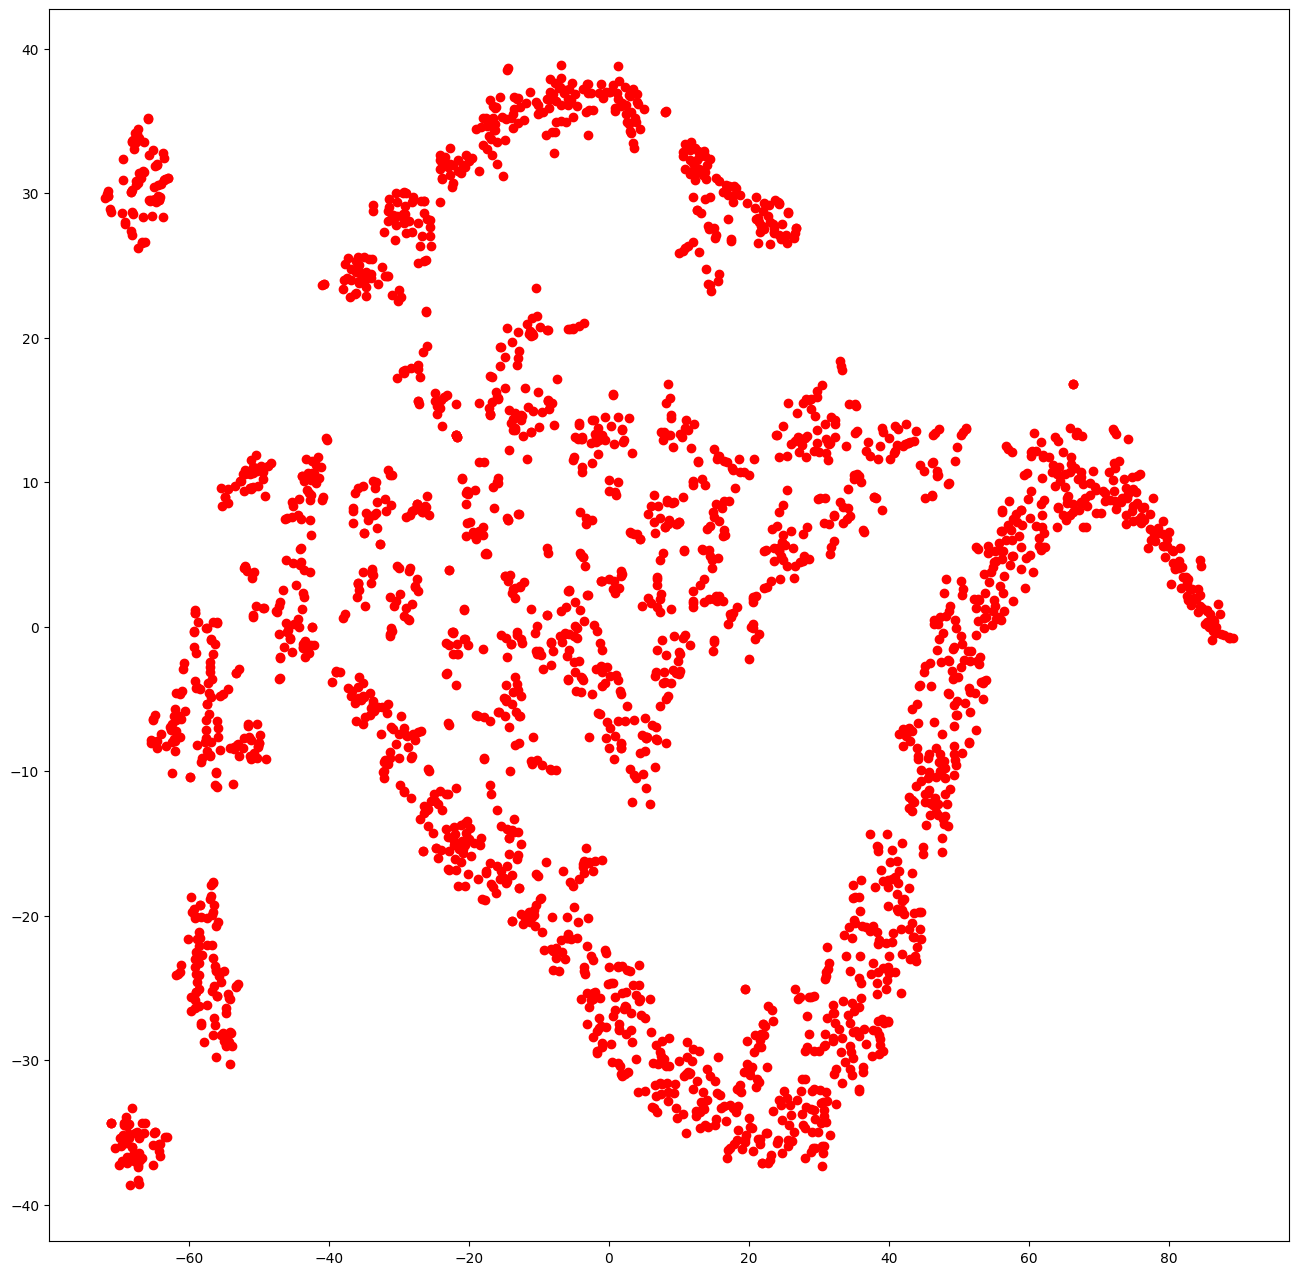

In [51]:
plt.figure(figsize=(16, 16))
plt.scatter(x_axis_add, y_axis_add, c='r')
plt.show()

In [53]:
all_mean_label, tsne_add

(['NRP',
  'NRP',
  'NRP',
  'NRP',
  'NRP',
  'NRP',
  'NRP',
  'NRP',
  'NRP',
  'NRP',
  'NRP',
  'NRP',
  'NRP',
  'NRP',
  'NRP',
  'NRP',
  'NRP',
  'NRP',
  'NRP',
  'NRP',
  'NRP',
  'NRP',
  'NRP',
  'NRP',
  'NRP',
  'NRP',
  'NRP',
  'NRP',
  'NRP',
  'NRP',
  'NRP',
  'NRP',
  'NRP',
  'NRP',
  'NRP',
  'NRP',
  'NRP',
  'NRP',
  'NRP',
  'NRP',
  'NRP',
  'NRP',
  'NRP',
  'NRP',
  'NRP',
  'NRP',
  'NRP',
  'NRP',
  'NRP',
  'NRP',
  'NRP',
  'NRP',
  'NRP',
  'NRP',
  'NRP',
  'NRP',
  'NRP',
  'NRP',
  'NRP',
  'NRP',
  'NRP',
  'NRP',
  'NRP',
  'NRP',
  'NRP',
  'NRP',
  'NRP',
  'NRP',
  'NRP',
  'NRP',
  'NRP',
  'NRP',
  'NRP',
  'NRP',
  'NRP',
  'NRP',
  'NRP',
  'NRP',
  'NRP',
  'NRP',
  'NRP',
  'NRP',
  'NRP',
  'NRP',
  'NRP',
  'NRP',
  'NRP',
  'NRP',
  'NRP',
  'NRP',
  'NRP',
  'NRP',
  'NRP',
  'NRP',
  'NRP',
  'NRP',
  'NRP',
  'NRP',
  'NRP',
  'NRP',
  'NRP',
  'NRP',
  'NRP',
  'NRP',
  'NRP',
  'NRP',
  'NRP',
  'NRP',
  'NRP',
  'NRP',
  'NRP',
 

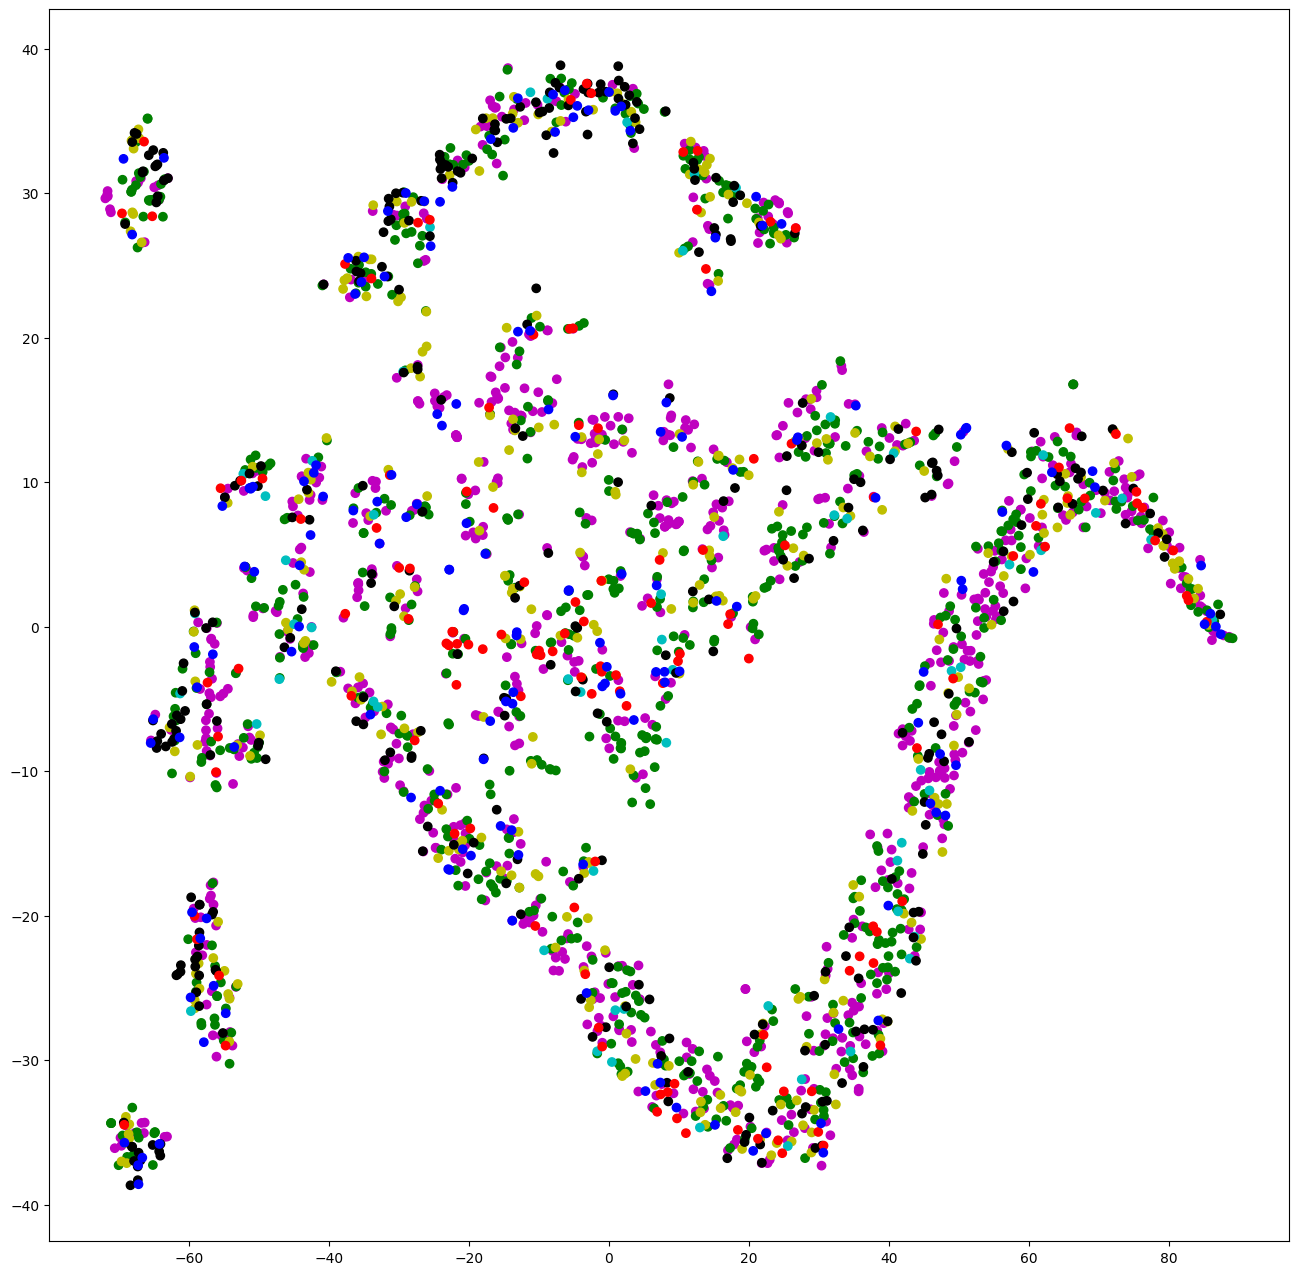

In [54]:
plt.figure(figsize=(16, 16))
plt.scatter(x_axis_add, y_axis_add, c=color_mean)
plt.show()

In [52]:
BGC_label_dict

defaultdict(list,
            {'NRP': [['BGC0000001_protein_1',
               'BGC0000001_protein_2',
               'BGC0000001_protein_3',
               'BGC0000001_protein_4',
               'BGC0000001_protein_5',
               'BGC0000001_protein_6',
               'BGC0000001_protein_7',
               'BGC0000001_protein_8',
               'BGC0000001_protein_9',
               'BGC0000001_protein_10',
               'BGC0000001_protein_11',
               'BGC0000001_protein_12',
               'BGC0000001_protein_13',
               'BGC0000001_protein_14',
               'BGC0000001_protein_15',
               'BGC0000001_protein_16',
               'BGC0000001_protein_17',
               'BGC0000001_protein_18',
               'BGC0000001_protein_19',
               'BGC0000001_protein_20',
               'BGC0000001_protein_21',
               'BGC0000001_protein_22',
               'BGC0000001_protein_23',
               'BGC0000001_protein_24',
               'BGC00000

In [5]:
env = lmdb.open('../lmdb_BGC', readonly=True)

In [6]:
with env.begin() as txn:
    cursor = txn.cursor()
    for key, value in cursor:
        print(key, value)
        break   

b'A0083_RS00005_LOWER' b'\x80\x04\x95\xc2\x06\x00\x00\x00\x00\x00\x00}\x94(\x8c\x05label\x94\x8c\x13A0083_RS00005_LOWER\x94\x8c\x14mean_representations\x94}\x94K\x06\x8c\x0ctorch._utils\x94\x8c\x12_rebuild_tensor_v2\x94\x93\x94(\x8c\rtorch.storage\x94\x8c\x10_load_from_bytes\x94\x93\x94B\xfc\x05\x00\x00\x80\x02\x8a\nl\xfc\x9cF\xf9 j\xa8P\x19.\x80\x02M\xe9\x03.\x80\x02}q\x00(X\x10\x00\x00\x00protocol_versionq\x01M\xe9\x03X\r\x00\x00\x00little_endianq\x02\x88X\n\x00\x00\x00type_sizesq\x03}q\x04(X\x05\x00\x00\x00shortq\x05K\x02X\x03\x00\x00\x00intq\x06K\x04X\x04\x00\x00\x00longq\x07K\x04uu.\x80\x02(X\x07\x00\x00\x00storageq\x00ctorch\nFloatStorage\nq\x01X\x0e\x00\x00\x0094008409016112q\x02X\x03\x00\x00\x00cpuq\x03M@\x01Ntq\x04Q.\x80\x02]q\x00X\x0e\x00\x00\x0094008409016112q\x01a.@\x01\x00\x00\x00\x00\x00\x00wvd\xbd\xf5E%>\xe5$\xed>\x1b\xdfI>\x9b\xe1\x07>|\xc6\xdd<Dn\x18==\xc2\xd8\xbd{\xe8\x89\xbc&Q\x8b\xba\x83\xf5\xff\xbd1=\xea=@K\xca\xbd\x19=\xa3=\xf6)\x99=}\xd5\t\xbe\xd1\x00&\xbb\xads\x

In [7]:
BGC_train_dataset = pd.read_csv('./BGC_train_dataset_inbalence.csv')
BGC_train_dataset

ID                                           sentence  \
0        BGC0000001_0  BGC0000001_protein_1 BGC0000001_protein_2 BGC0...   
1       BGC0000001_-1  BGC0000001_protein_1 BGC0000001_protein_2 BGC0...   
2        BGC0000001_1  BGC0000001_protein_1 BGC0000001_protein_2 BGC0...   
3        BGC0000001_2  BGC0000001_protein_1 BGC0000001_protein_2 BGC0...   
4        BGC0000001_3  BGC0000001_protein_1 BGC0000001_protein_2 BGC0...   
...               ...                                                ...   
32505  Negative_19995  I6J98_RS02370 I6J98_RS02375 I6J98_RS02380 I6J9...   
32506  Negative_19996  EW030_RS05995 EW030_RS06000 EW030_RS06005 EW03...   
32507  Negative_19997  K6966_RS12450 K6966_RS12455 K6966_RS12460 K696...   
32508  Negative_19998  E4311_RS03965 E4311_RS03970 E4311_RS03975 E431...   
32509  Negative_19999  AV16_RS14320 AV16_RS14325 AV16_RS14330 AV16_RS...   

      labels isBGC                                         TDsentence  \
0        NRP   Yes  BGC0000001_protein_1 BGC0000001_protein_2 BGC0...   
1        NRP   Yes  AM387_RS28560 AM387_RS28565 AM387_RS28570 AM38...   
2        NRP   Yes  AV75_26810 AV75_26815 BGC0000001_protein_1 BGC...   
3        NRP   Yes  LZK30_RS06935 LZK30_RS06940 LZK30_RS06945 LZK3...   
4        NRP   Yes  AXA52_RS20855 AXA52_RS20860 AXA52_RS20865 AXA5...   
...      ...   ...                                                ...   
32505    Non    No  I6J98_RS02370 I6J98_RS02375 I6J98_RS02380 I6J9...   
32506    Non    No  EW030_RS05995 EW030_RS06000 EW030_RS06005 EW03...   
32507    Non    No  K6966_RS12450 K6966_RS12455 K6966_RS12460 K696...   
32508    Non    No  E4311_RS03965 E4311_RS03970 E4311_RS03975 E431...   
32509    Non    No  AV16_RS14320 AV16_RS14325 AV16_RS14330 AV16_RS...   

                                                TDlabels  
0      1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 ...  
1      0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...  
2      0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 ...  
3      0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...  
4      0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...  
...                                                  ...  
32505  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...  
32506  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...  
32507  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...  
32508  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...  
32509  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...  

[32510 rows x 6 columns]

In [18]:
BGC_labels = BGC_dataset['labels'].values
BGC_labels = map(lambda x:x.split()[0] if ' 'in x else x, list(BGC_labels))
BGC_labels = list(BGC_labels)
BGC_labels

['NRP',
 'Polyketide',
 'Other',
 'Polyketide',
 'Alkaloid',
 'NRP',
 'RiPP',
 'Other',
 'NRP',
 'Saccharide',
 'Terpene',
 'RiPP',
 'Polyketide',
 'Polyketide',
 'Alkaloid',
 'Other',
 'Saccharide',
 'Terpene',
 'NRP',
 'Other',
 'NRP',
 'Polyketide',
 'NRP',
 'NRP',
 'NRP',
 'Other',
 'Terpene',
 'RiPP',
 'Alkaloid',
 'Polyketide',
 'NRP',
 'Polyketide',
 'Polyketide',
 'NRP',
 'Polyketide',
 'RiPP',
 'Other',
 'NRP',
 'Polyketide',
 'NRP',
 'Other',
 'RiPP',
 'Polyketide',
 'Terpene',
 'Saccharide',
 'NRP',
 'Polyketide',
 'Other',
 'NRP',
 'Terpene',
 'Polyketide',
 'RiPP',
 'NRP',
 'NRP',
 'Polyketide',
 'NRP',
 'Polyketide',
 'Polyketide',
 'Terpene',
 'Other',
 'Saccharide',
 'Terpene',
 'Other',
 'NRP',
 'NRP',
 'Polyketide',
 'NRP',
 'Other',
 'Other',
 'NRP',
 'Polyketide',
 'Polyketide',
 'Saccharide',
 'Terpene',
 'NRP',
 'RiPP',
 'Other',
 'Polyketide',
 'NRP',
 'Polyketide',
 'Other',
 'Terpene',
 'Polyketide',
 'RiPP',
 'Polyketide',
 'Saccharide',
 'NRP',
 'Polyketide',

In [20]:
list(BGC_seq)

['BGC0000001_protein_1 BGC0000001_protein_2 BGC0000001_protein_3 BGC0000001_protein_4 BGC0000001_protein_5 BGC0000001_protein_6 BGC0000001_protein_7 BGC0000001_protein_8 BGC0000001_protein_9 BGC0000001_protein_10 BGC0000001_protein_11 BGC0000001_protein_12 BGC0000001_protein_13 BGC0000001_protein_14 BGC0000001_protein_15 BGC0000001_protein_16 BGC0000001_protein_17 BGC0000001_protein_18 BGC0000001_protein_19 BGC0000001_protein_20 BGC0000001_protein_21 BGC0000001_protein_22 BGC0000001_protein_23 BGC0000001_protein_24 BGC0000001_protein_25 BGC0000001_protein_26 BGC0000001_protein_27 BGC0000001_protein_28',
 'BGC0000002_protein_1 BGC0000002_protein_2 BGC0000002_protein_3 BGC0000002_protein_4 BGC0000002_protein_5 BGC0000002_protein_6 BGC0000002_protein_7 BGC0000002_protein_8 BGC0000002_protein_9 BGC0000002_protein_10 BGC0000002_protein_11 BGC0000002_protein_12 BGC0000002_protein_13 BGC0000002_protein_14 BGC0000002_protein_15 BGC0000002_protein_16 BGC0000002_protein_17 BGC0000002_protein_18 

In [31]:
sentence_embedding = []
sentence_add_embedding = []
with env.begin() as txn:
    for seq in BGC_seq:
        seq = seq.split() if ' 'in seq else [seq, ]
        add_embedding = np.zeros(320)
        words_embedding = []
        for word in seq:
            word_embedding = np.array(pickle.loads(txn.get(word.encode('ascii')))['mean_representations'][6])
            # print(type(word_embedding))
            words_embedding.append(word_embedding)
            add_embedding += word_embedding
        sentence_embedding.append(words_embedding)
        sentence_add_embedding.append(add_embedding/len(seq))


In [28]:
len(sentence_embedding[0])

28

In [30]:
nonBGC_seq = list(BGC_train_dataset[-1000:]['sentence'].values)
nonBGC_seq[:5]

['HV223_00235 HV223_00240 HV223_00245 HV223_00250 HV223_00255 HV223_00260 HV223_00265 HV223_00270 HV223_00275 HV223_00280 HV223_00285 HV223_00290 HV223_00295 HV223_00300 HV223_00305 HV223_00310 HV223_00315 HV223_00320 HV223_00325 HV223_00330 HV223_00335 HV223_00340 HV223_00345 HV223_00350 HV223_00355 HV223_00360 HV223_00365 HV223_00370 HV223_00375 HV223_00380 HV223_00385 HV223_00390 HV223_00395 HV223_00400 HV223_00405 HV223_00410 HV223_00415 HV223_00420 HV223_00425 HV223_00430 HV223_00435 HV223_00440 HV223_00445 HV223_00450 HV223_00455 HV223_00460 HV223_00465 HV223_00470 HV223_00475 HV223_00480 HV223_00485 HV223_00490 HV223_00495 HV223_00500 HV223_00505 HV223_00510 HV223_00515 HV223_00520 HV223_00525 HV223_00530 HV223_00535 HV223_00540 HV223_00545 HV223_00550 HV223_00555 HV223_00560 HV223_00565 HV223_00570 HV223_00575 HV223_00580 HV223_00590 HV223_00595 HV223_00600 HV223_00605 HV223_00610 HV223_00615 HV223_00620 HV223_00625 HV223_00630 HV223_00635 HV223_00640 HV223_00645 HV223_00650 HV

In [32]:
tsne = TSNE(n_components=2, random_state=0)
add_mean = tsne.fit_transform(np.stack(sentence_add_embedding))
x_axis_add_mean = add_mean[:, 0]
y_axis_add_mean = add_mean[:, 1]

In [34]:
label_set = set(BGC_labels)
color_dict = dict(zip(label_set, ['r', 'g', 'b', 'y', 'c', 'm', 'k']))
color_mean = [color_dict[label] for label in BGC_labels]

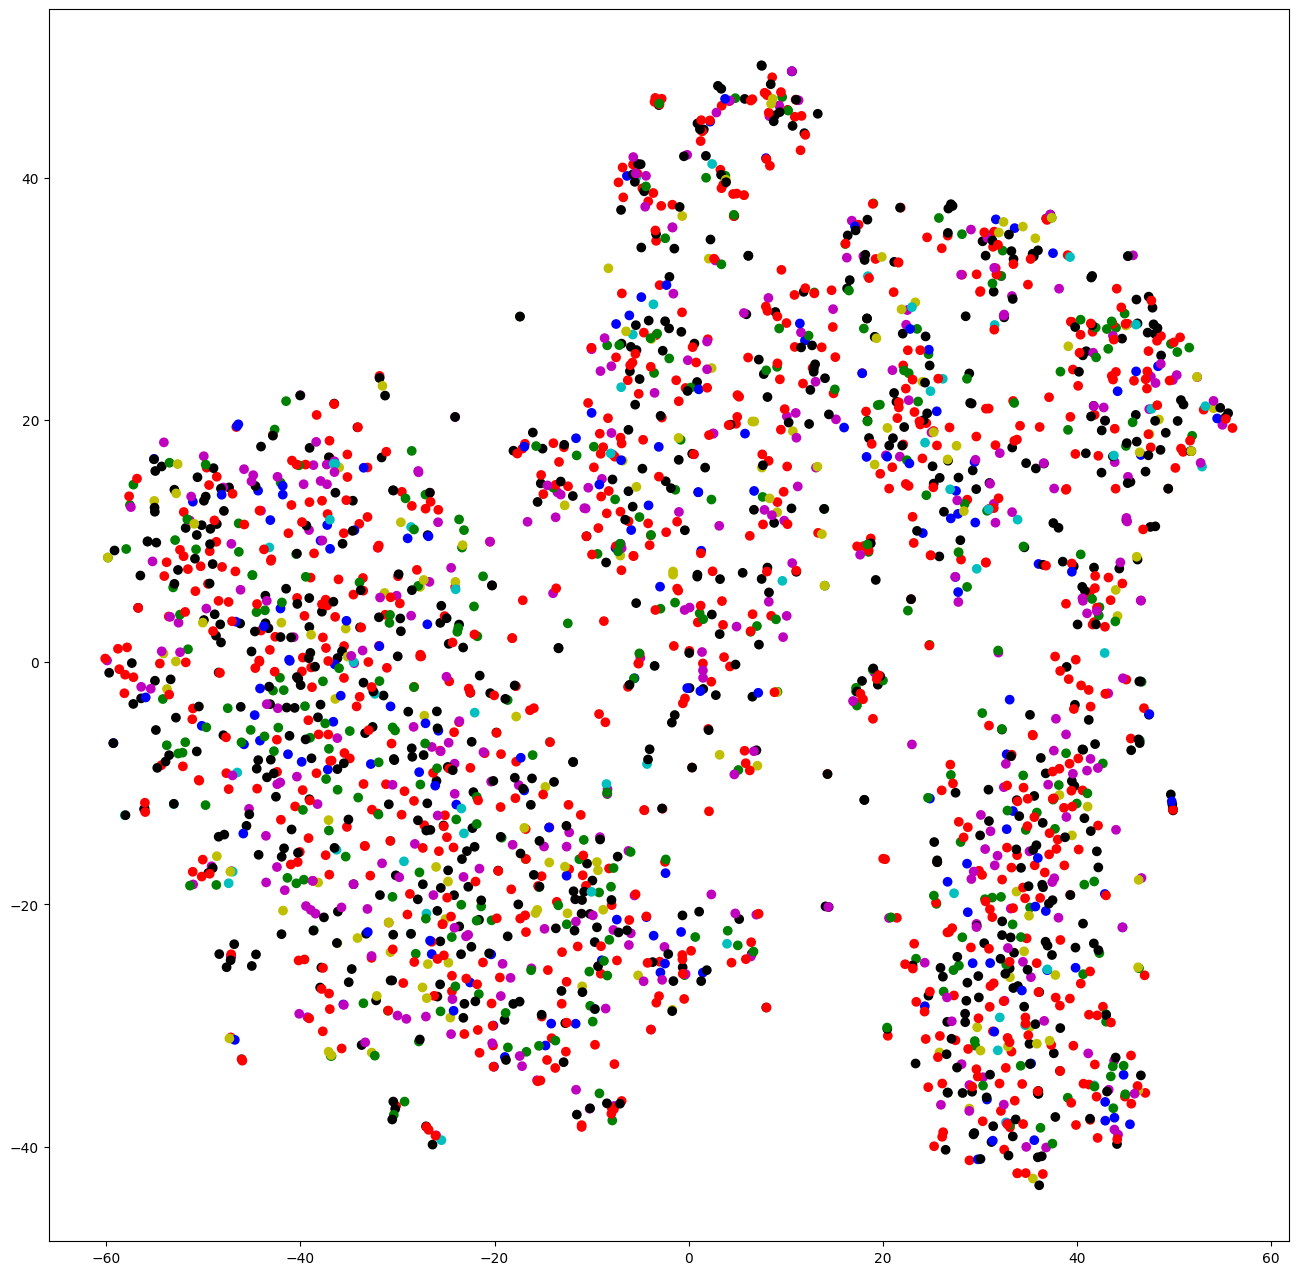

In [35]:
plt.figure(figsize=(16, 16))
plt.scatter(x_axis_add_mean, y_axis_add_mean, c=color_mean)
plt.show()

In [36]:
with env.begin() as txn:
    for seq in nonBGC_seq:
        seq = seq.split()
        add_embedding = np.zeros(320)
        words_embedding = []
        for word in seq:
            word_embedding = np.array(pickle.loads(txn.get(word.encode('ascii')))['mean_representations'][6])
            # print(type(word_embedding))
            words_embedding.append(word_embedding)
            add_embedding += word_embedding
        sentence_embedding.append(words_embedding)
        sentence_add_embedding.append(add_embedding/len(seq))
        color_mean.append('aquamarine')


In [37]:
tsne = TSNE(n_components=2, random_state=0)
add_mean = tsne.fit_transform(np.stack(sentence_add_embedding))
x_axis_add_mean = add_mean[:, 0]
y_axis_add_mean = add_mean[:, 1]

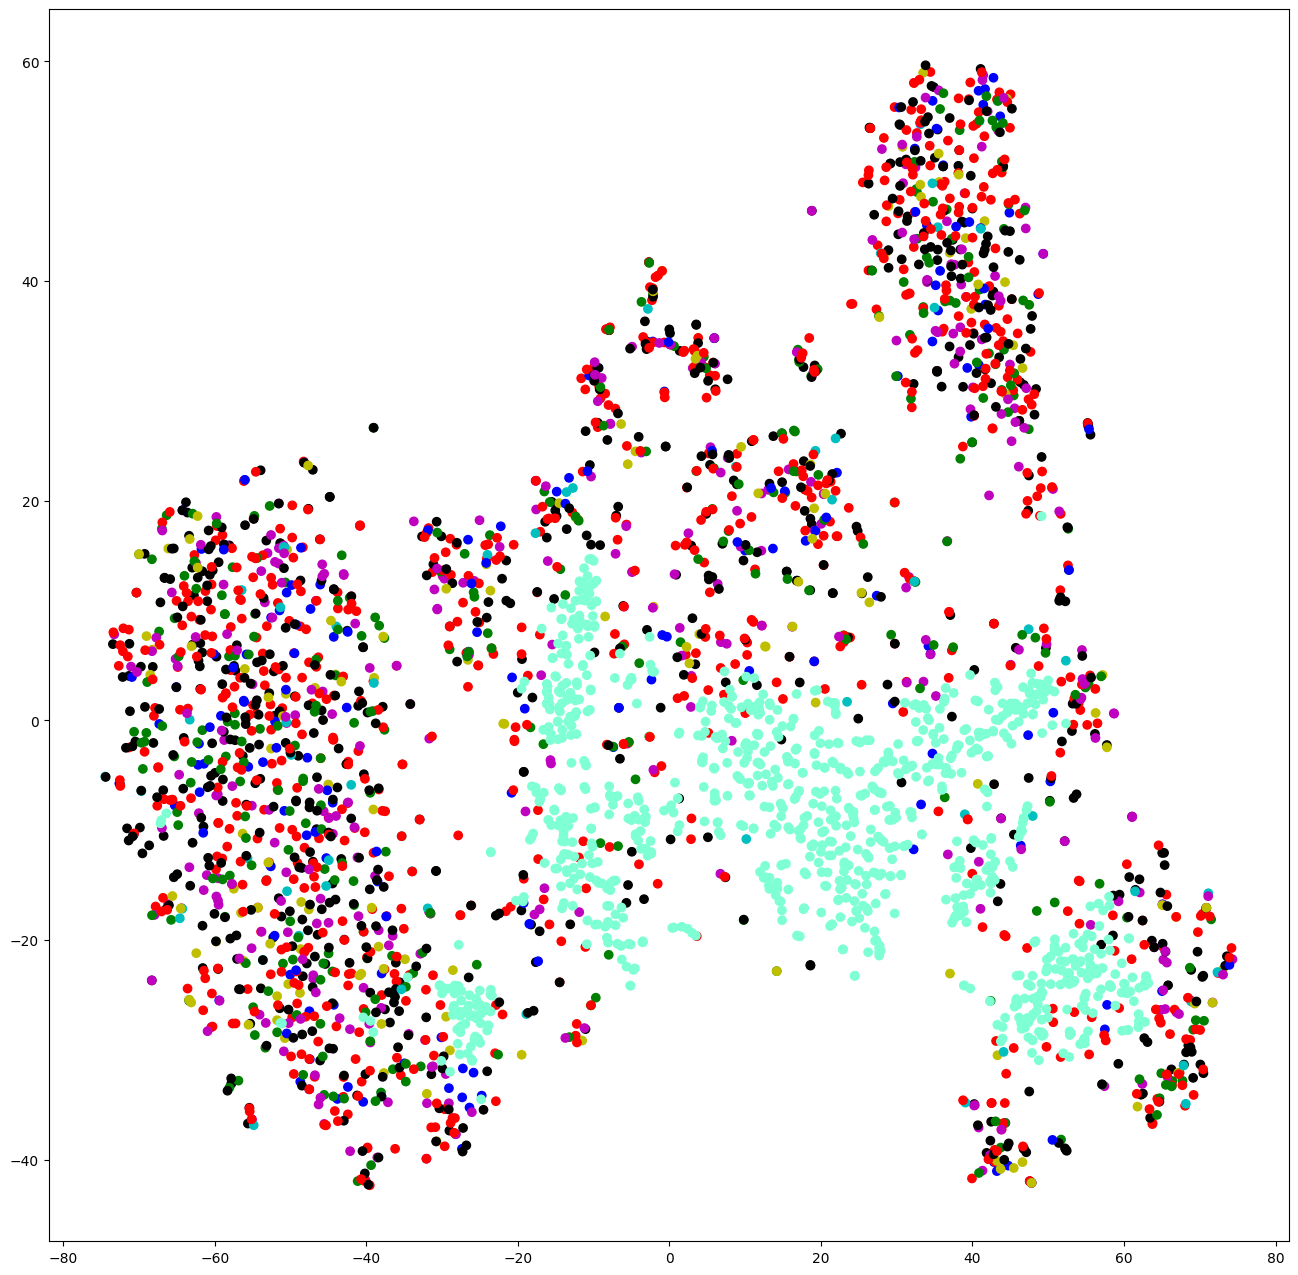

In [38]:
plt.figure(figsize=(16, 16))
plt.scatter(x_axis_add_mean, y_axis_add_mean, c=color_mean)
plt.show()

In [40]:
sentence_single_embedding = sentence_add_embedding[:]
color_single = color_mean[:]
BGC_origin_labels = list(BGC_dataset['labels'].values)
i = 0
while i<len(BGC_origin_labels):
    if ' ' in BGC_origin_labels[i]:
        BGC_origin_labels.pop(i)
        sentence_single_embedding.pop(i)
        color_single.pop(i)
    else:
        i += 1

In [41]:
len(sentence_single_embedding), len(color_single), len(BGC_origin_labels)

(3035, 3035, 2035)

In [47]:
tsne = TSNE(n_components=2, random_state=123, perplexity=40, verbose=2)
add_single_mean = tsne.fit_transform(np.stack(sentence_single_embedding))
x_axis_add_single_mean = add_single_mean[:, 0]
y_axis_add_single_mean = add_single_mean[:, 1]

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 3035 samples in 0.001s...
[t-SNE] Computed neighbors for 3035 samples in 0.143s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3035
[t-SNE] Computed conditional probabilities for sample 2000 / 3035
[t-SNE] Computed conditional probabilities for sample 3000 / 3035
[t-SNE] Computed conditional probabilities for sample 3035 / 3035
[t-SNE] Mean sigma: 0.194071
[t-SNE] Computed conditional probabilities in 0.270s
[t-SNE] Iteration 50: error = 70.9644699, gradient norm = 0.0241485 (50 iterations in 0.446s)
[t-SNE] Iteration 100: error = 67.8448105, gradient norm = 0.0022420 (50 iterations in 0.346s)
[t-SNE] Iteration 150: error = 67.5589676, gradient norm = 0.0006042 (50 iterations in 0.371s)
[t-SNE] Iteration 200: error = 67.5066757, gradient norm = 0.0002270 (50 iterations in 0.319s)
[t-SNE] Iteration 250: error = 67.4975204, gradient norm = 0.0001833 (50 iterations in 0.358s)
[t-SNE] KL divergence after 250 iterat

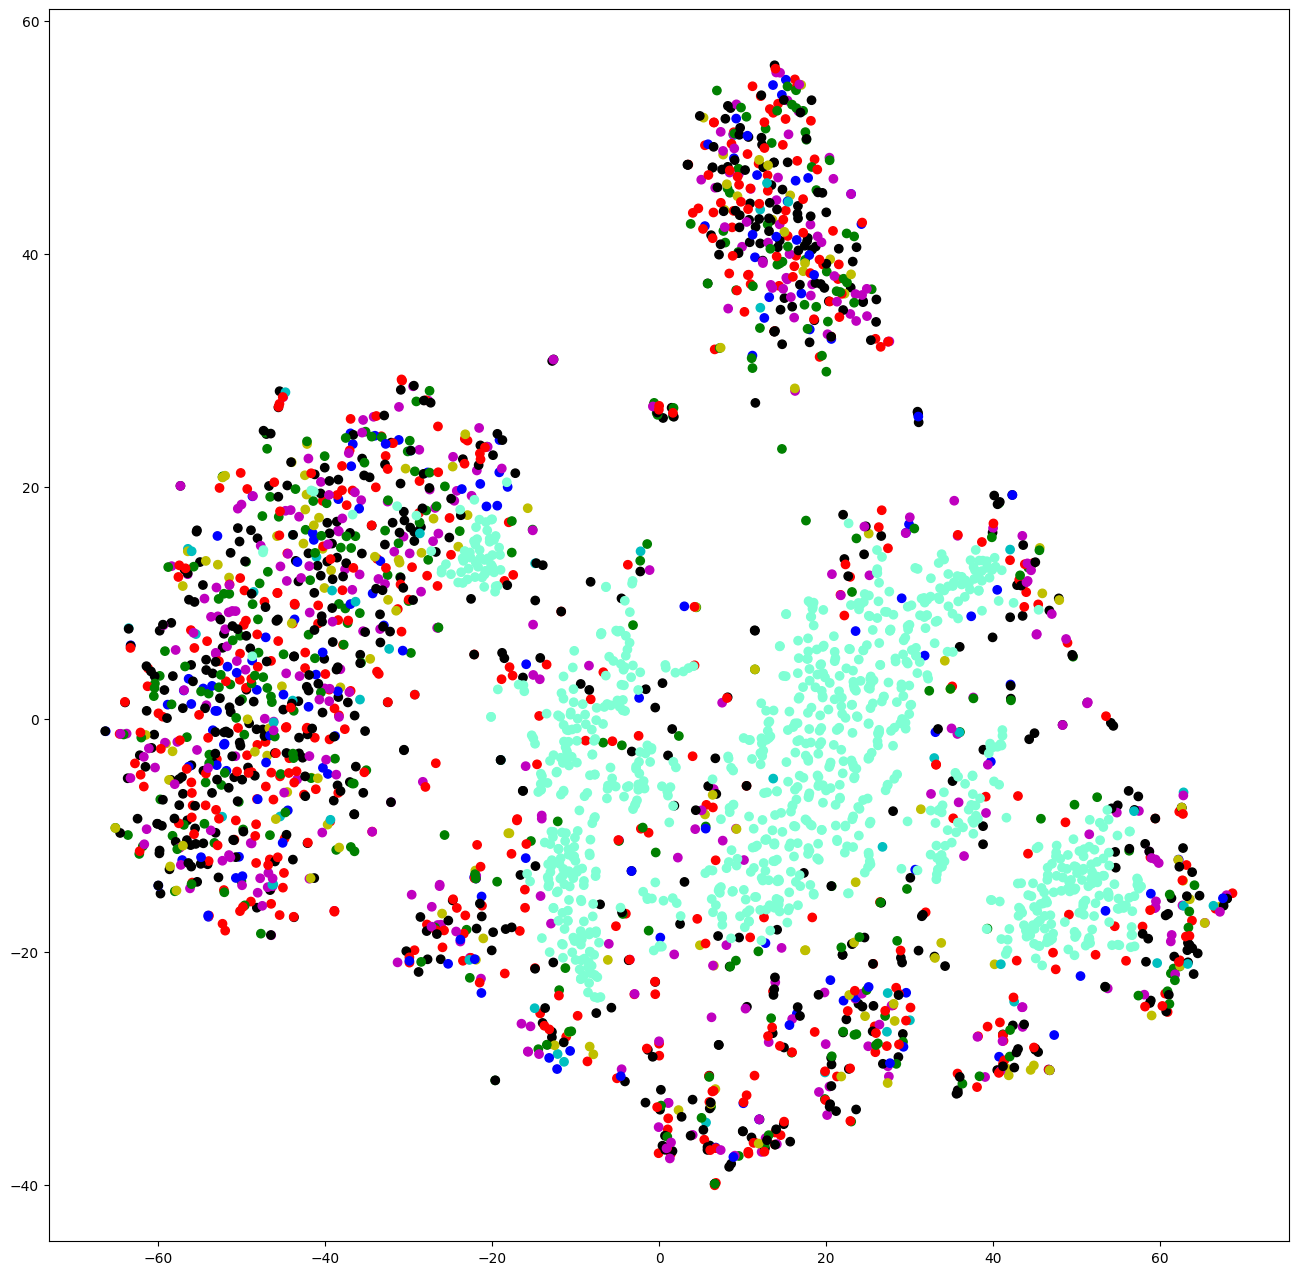

In [48]:
plt.figure(figsize=(16, 16))
plt.scatter(x_axis_add_single_mean, y_axis_add_single_mean, c=color_single)
plt.show()